# Introduction au Web Scraping avec Python

## Sommaire
1. Présentation du Site "All Sides Media Bias Ratings"
2. Présentation de l'objectif Data Analysis
3. Présentation de l'objectif du Webinar
4. Présentation du Web Scraping
    * Qu'est ce que le DOM HTML ?
    * Présentation de Google Chrome DevTools
    * Qu'est ce que le protocole HTTP ?
    * Qu'est ce que le Web Scraping ?
    * Différence entre Scraper et Crawler
    * Limites du Web Scraping
        * Limites légales
        * Limites pratiques
5. En pratique !

In [89]:
# https://www.allsides.com/media-bias/media-bias-rating-methods

In [90]:
#https://www.allsides.com/robots.txt
#http://www.w3big.com/images/pic_htmltree.gif
#https://imgur.com/fvsvp
#http://tecfa.unige.ch/guides/tie/html/cgi-intro/cgi-intro-3.html

In [91]:
import requests

In [92]:
from bs4 import BeautifulSoup

In [93]:
from time import sleep

### Faire une requête HTTP en Python

In [82]:
url = 'https://www.allsides.com/media-bias/media-bias-ratings'

r = requests.get(url)

print(r.content[:100])

b'<!DOCTYPE html>\n<!--[if IEMobile 7]><html class="iem7"  lang="en" dir="ltr"><![endif]-->\n<!--[if lte'


### Analyser le HTML avec BeautifulSoup

In [88]:
soup = BeautifulSoup(r.content, 'html.parser')

In [96]:
??requests.get

Signature: requests.get(url, params=None, **kwargs)
Source:   
def get(url, params=None, **kwargs):
    r"""Sends a GET request.

    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary, list of tuples or bytes to send
        in the query string for the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response
    """

    kwargs.setdefault('allow_redirects', True)
    return request('get', url, params=params, **kwargs)
File:      ~/.local/share/virtualenvs/web-scraping-webinar-cfWKJWuV/lib/python3.9/site-packages/requests/api.py
Type:      function


In [103]:
soup.select_one('div').select_one('span')

<span style="display: inline-block;">
<div id="div-gpt-ad-1584652557629-0">
<script>
    googletag.cmd.push(function() { googletag.display('div-gpt-ad-1584652557629-0'); });
  </script>
</div>
<div class="ad-notice"><div style="float:left;"><a href="/user/register"><strong>Go ad-free!</strong> Support AllSides.</a></div>   <a href="/ads">About these ads</a></div><div style="clear: both;"></div>
</span>

### Trouver les éléments CSS avec l'inspecteur

1. To get a tag, such as `<a></a>`, `<body></body>`, use the naked name for the tag. E.g. `select_one('a')` gets an anchor/link element, `select_one('body')` gets the body element
2. `.temp` gets an element with a class of **temp**, E.g. to get `<a class=\"temp\"></a>` use `select_one('.temp')`
3. `#temp` gets an element with an id of **temp**, E.g. to get `<a id=\"temp\"></a>` use `select_one('#temp')`
4. `.temp.example` gets an element with both classes **temp** and **example**, E.g. to get `<a class=\"temp example\"></a>` use `select_one('.temp.example')`
5. `.temp a` gets an anchor element nested inside of a parent element with class **temp**, E.g. to get `<div class=\"temp\"><a></a></div>` use `select_one('.temp a')`. Note the space between `.temp` and `a`.
6. `.temp .example` gets an element with class **example** nested inside of a parent element with class **temp**, E.g. to get `<div class=\"temp\"><a class=\"example\"></a></div>` use `select_one('.temp .example')`. Again, note the space between `.temp` and `.example`. The space tells the selector that the class after the space is a child of the class before the space.
7. ids, such as `<a id=one></a>`, are unique so you can usually use the id selector by itself to get the right element. No need to do nested selectors when using ids.

#### Récupérer la table de données

In [104]:
rows = soup.select('tbody tr')

In [107]:
rows[0]

<tr class="odd views-row-first">
<td class="views-field views-field-title source-title">
<a href="/news-source/abc-news-media-bias">ABC News (Online)</a> </td>
<td class="views-field views-field-field-bias-image">
<a href="/media-bias/left-center"><img alt="AllSides Media Bias Rating: Lean Left" height="24" src="https://www.allsides.com/sites/default/files/styles/bias144x24/public/bias-leaning-left.png?itok=mtG3ToEN" title="AllSides Media Bias Rating: Lean Left" typeof="foaf:Image" width="144"/></a> </td>
<td class="views-field views-field-nothing-1 what-do-you-think">
<div class="agree-disagree-widget"><div class="rate-widget-4 rate-widget clear-block rate-average rate-widget-yesno rate-f13adc4a6caee57d894f9d7ef192d7f3 rate-node-76-4-1" id="rate-node-76-4-1">
<div class="item-list"><ul><li class="first"><a class="rate-button rate-btn" href="/media-bias/media-bias-ratings?rate=zmyDLixxBj_ytZsb_p9D32b0gPWtDEaeOSu_YIdkTIc" id="rate-button-3" rel="nofollow" title="agree">agree</a></li>
<l

#### Récupérer le nom de la page

In [110]:
row = rows[2]

name = row.select_one('.source-title').text.strip()

print(name)

AP Politics & Fact Check


#### Récupérer le lien vers la page All Sides du média

In [111]:
allsides_page = row.select_one('.source-title a')['href']
allsides_page = 'https://www.allsides.com' + allsides_page

print(allsides_page)

https://www.allsides.com/news-source/ap-fact-check-media-bias


#### Récupérer le biais du site

In [113]:
bias = row.select_one('.views-field-field-bias-image a')['href']
bias = bias.split('/')[-1]

print(bias)

left-center


#### Récupérer la donnée communautaire (agree / disagree)

In [114]:
agree = row.select_one('.agree').text
agree = int(agree)

disagree = row.select_one('.disagree').text
disagree = int(disagree)

agree_ratio = agree / disagree

print(f"Agree: {agree}, Disagree: {disagree}, Ratio {agree_ratio:.2f}")

Agree: 3276, Disagree: 4001, Ratio 0.82


In [115]:
print(row.select_one('.community-feedback-rating-page'))

None


In [12]:
def get_agreeance_text(ratio):
    if ratio > 3: return "absolutely agrees"
    elif 2 < ratio <= 3: return "strongly agrees"
    elif 1.5 < ratio <= 2: return "agrees"
    elif 1 < ratio <= 1.5: return "somewhat agrees"
    elif ratio == 1: return "neutral"
    elif 0.67 < ratio < 1: return "somewhat disagrees"
    elif 0.5 < ratio <= 0.67: return "disagrees"
    elif 0.33 < ratio <= 0.5: return "strongly disagrees"
    elif ratio <= 0.33: return "absolutely disagrees"
    else: return None
    
print(get_agreeance_text(2.5))

strongly agrees


In [13]:
data= []

for row in rows:
    d = dict()
    
    d['name'] = row.select_one('.source-title').text.strip()
    d['allsides_page'] = 'https://www.allsides.com' + row.select_one('.source-title a')['href']
    d['bias'] = row.select_one('.views-field-field-bias-image a')['href'].split('/')[-1]
    d['agree'] = int(row.select_one('.agree').text)
    d['disagree'] = int(row.select_one('.disagree').text)
    d['agree_ratio'] = d['agree'] / d['disagree']
    d['agreeance_text'] = get_agreeance_text(d['agree_ratio'])
    
    data.append(d)

In [116]:
from pprint import pprint

In [117]:
pprint(data[0])

{'agree': 32027,
 'agree_ratio': 1.9358679883945842,
 'agreeance_text': 'agrees',
 'allsides_page': 'https://www.allsides.com/news-source/abc-news-media-bias',
 'bias': 'left-center',
 'disagree': 16544,
 'name': 'ABC News (Online)'}


#### Requêter, analyser et collecter des données sur plusieurs pages

In [15]:
pages = [
    'https://www.allsides.com/media-bias/media-bias-ratings',
    'https://www.allsides.com/media-bias/media-bias-ratings?page=1',
    'https://www.allsides.com/media-bias/media-bias-ratings?page=2'
]

In [16]:
from time import sleep

data= []

for page in pages:
    r = requests.get(page)
    soup = BeautifulSoup(r.content, 'html.parser')
    
    rows = soup.select('tbody tr')

    for row in rows:
        try:
            d = dict()

            d['name'] = row.select_one('.source-title').text.strip()
            d['allsides_page'] = 'https://www.allsides.com' + row.select_one('.source-title a')['href']
            d['bias'] = row.select_one('.views-field-field-bias-image a')['href'].split('/')[-1]
            d['agree'] = int(row.select_one('.agree').text)
            d['disagree'] = int(row.select_one('.disagree').text)
            d['agree_ratio'] = d['agree'] / d['disagree']
            d['agreeance_text'] = get_agreeance_text(d['agree_ratio'])

            data.append(d)
        except:
            continue
    
    sleep(10)

In [17]:
import tqdm

In [18]:
from ipywidgets import IntProgress

In [41]:
#for d in tqdm.tqdm(data):
#    r = requests.get(d['allsides_page'])
#    soup = BeautifulSoup(r.content, 'html.parser')
#    
#    try:
#        website = soup.select_one('.www')['href']
#        d['website'] = website
#    except TypeError:
#        pass
#    
#    sleep(10)

In [ ]:
data

#### Sauvegarder nos données

In [21]:
import json

with open('allsides.json', 'w') as f:
    json.dump(data, f)

In [119]:
with open('allsides.json', 'r') as f:
    data = json.load(f)

### Analyse de donnée rapide

#### Sur quels sites les internautes sont complètement d'accord avec la notation AllMedia ?

In [120]:
abs_agree = [d for d in data if d['agreeance_text'] == 'absolutely agrees']

print(f"{'Outlet':<20} {'Bias':<20}")
print("-" * 30)

for d in abs_agree:
    print(f"{d['name']:<20} {d['bias']:<20}")

Outlet               Bias                
------------------------------
AlterNet             left                
Breitbart News       right               
CNN (Opinion)        left                
Daily Beast          left                
Democracy Now        left                
Fox News (Opinion)   right               
Mother Jones         left                
MSNBC                left                
New York Times (Opinion) left                
The Federalist       right               
The Intercept        left                
The New Yorker       left                


In [50]:
import pandas as pd

df = pd.read_json(open('allsides.json', 'r'))

df.set_index('name', inplace=True)

df.head()

,allsides_page,bias,agree,disagree,agree_ratio,agreeance_text
name,,,,,,
ABC News (Online),https://www.allsides.com/news-source/abc-news-...,left-center,32027,16544,1.935868,agrees
AlterNet,https://www.allsides.com/news-source/alternet-...,left,11913,2461,4.840715,absolutely agrees
AP Politics & Fact Check,https://www.allsides.com/news-source/ap-fact-c...,left-center,3274,3999,0.818705,somewhat disagrees
Associated Press,https://www.allsides.com/news-source/associate...,center,23995,17822,1.346370,somewhat agrees
Axios,https://www.allsides.com/news-source/axios,center,4752,4978,0.954600,somewhat disagrees


In [121]:
df.tail()

,allsides_page,bias,agree,disagree,agree_ratio,agreeance_text,total_votes
name,,,,,,,
The Federalist,https://www.allsides.com/news-source/federalist,right,8079,2481,3.256348,absolutely agrees,10560
The New Yorker,https://www.allsides.com/news-source/new-yorker,left,8249,1989,4.147310,absolutely agrees,10238
Axios,https://www.allsides.com/news-source/axios,center,4752,4978,0.954600,somewhat disagrees,9730
AP Politics & Fact Check,https://www.allsides.com/news-source/ap-fact-c...,left-center,3274,3999,0.818705,somewhat disagrees,7273
The Intercept,https://www.allsides.com/news-source/intercept,left,4671,1342,3.480626,absolutely agrees,6013


In [51]:
df[df['agreeance_text'] == 'somewhat disagrees']

,allsides_page,bias,agree,disagree,agree_ratio,agreeance_text
name,,,,,,
AP Politics & Fact Check,https://www.allsides.com/news-source/ap-fact-c...,left-center,3274,3999,0.818705,somewhat disagrees
Axios,https://www.allsides.com/news-source/axios,center,4752,4978,0.954600,somewhat disagrees
Bloomberg,https://www.allsides.com/news-source/bloomberg...,left-center,14390,19879,0.723879,somewhat disagrees
Christian Science Monitor,https://www.allsides.com/news-source/christian...,center,14559,18172,0.801178,somewhat disagrees
CNN (Online News),https://www.allsides.com/news-source/cnn-media...,left,45805,45999,0.995783,somewhat disagrees
Fox News (Online News),https://www.allsides.com/news-source/fox-news-...,right-center,38088,45049,0.845479,somewhat disagrees
NBC News (Online),https://www.allsides.com/news-source/nbc-news-...,left-center,10835,10895,0.994493,somewhat disagrees
New York Times (News),https://www.allsides.com/news-source/new-york-...,left-center,26856,36592,0.733931,somewhat disagrees
NPR (Opinion),https://www.allsides.com/news-source/npr-edito...,left-center,7287,8088,0.900964,somewhat disagrees


In [52]:
df['total_votes'] = df['agree'] + df['disagree']
df.sort_values('total_votes', ascending=False, inplace=True)

df.head(10)

,allsides_page,bias,agree,disagree,agree_ratio,agreeance_text,total_votes
name,,,,,,,
TheBlaze.com,https://www.allsides.com/news-source/theblaze-...,right,95506,77827,1.227158,somewhat agrees,173333
CNN (Online News),https://www.allsides.com/news-source/cnn-media...,left,45805,45999,0.995783,somewhat disagrees,91804
Fox News (Online News),https://www.allsides.com/news-source/fox-news-...,right-center,38088,45049,0.845479,somewhat disagrees,83137
New York Times (News),https://www.allsides.com/news-source/new-york-...,left-center,26856,36592,0.733931,somewhat disagrees,63448
Washington Post,https://www.allsides.com/news-source/washingto...,left-center,34007,22572,1.506601,agrees,56579
NPR (Online News),https://www.allsides.com/news-source/npr-media...,center,29892,26676,1.120558,somewhat agrees,56568
HuffPost,https://www.allsides.com/news-source/huffpost-...,left,33344,21895,1.522905,agrees,55239
Politico,https://www.allsides.com/news-source/politico-...,left-center,21945,28829,0.761213,somewhat disagrees,50774
BBC News,https://www.allsides.com/news-source/bbc-news-...,center,26706,22767,1.173014,somewhat agrees,49473


In [53]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [122]:
# liste des thèmes matplotlib

In [54]:
df2 = df.head(25).copy()

df2.head()

,allsides_page,bias,agree,disagree,agree_ratio,agreeance_text,total_votes
name,,,,,,,
TheBlaze.com,https://www.allsides.com/news-source/theblaze-...,right,95506,77827,1.227158,somewhat agrees,173333
CNN (Online News),https://www.allsides.com/news-source/cnn-media...,left,45805,45999,0.995783,somewhat disagrees,91804
Fox News (Online News),https://www.allsides.com/news-source/fox-news-...,right-center,38088,45049,0.845479,somewhat disagrees,83137
New York Times (News),https://www.allsides.com/news-source/new-york-...,left-center,26856,36592,0.733931,somewhat disagrees,63448
Washington Post,https://www.allsides.com/news-source/washingto...,left-center,34007,22572,1.506601,agrees,56579


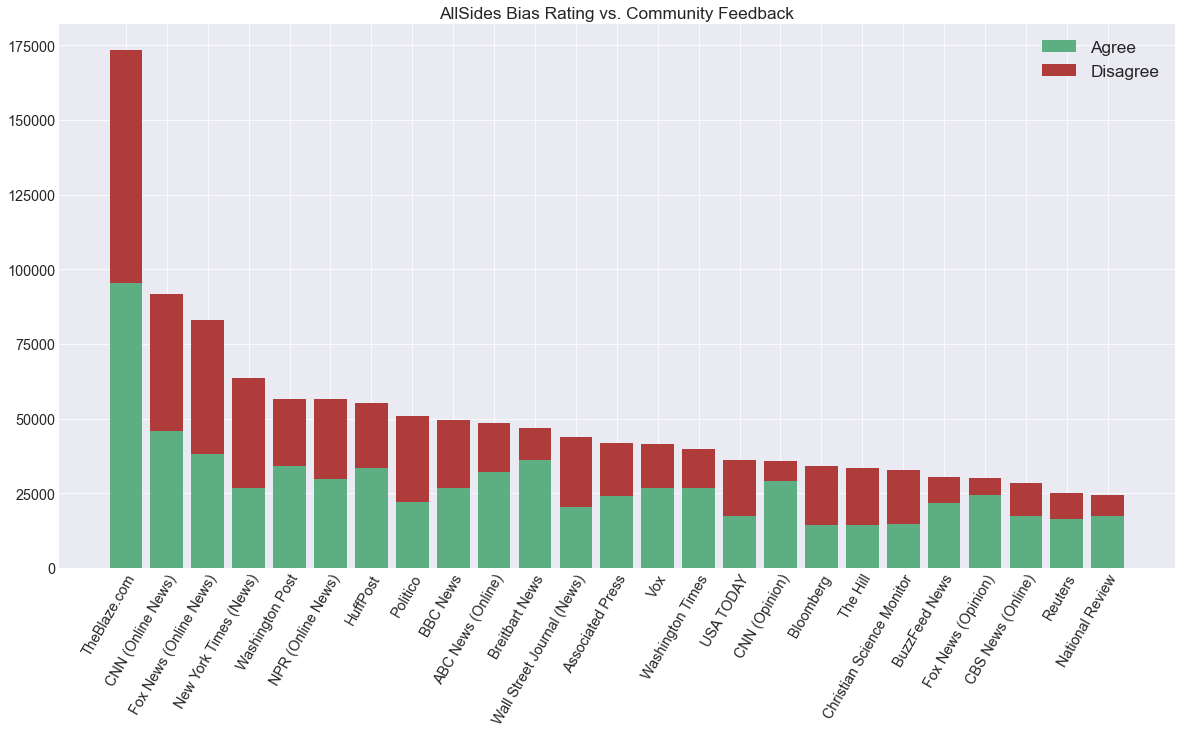

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(df2.index, df2['agree'], color='#5DAF83')
ax.bar(df2.index, df2['disagree'], bottom=df2['agree'], color='#AF3B3B')

ax.set_ylabel = 'Total feedback'

plt.yticks(fontsize='x-large')
plt.xticks(rotation=60, ha='right', fontsize='x-large', rotation_mode='anchor')

plt.legend(['Agree', 'Disagree'], fontsize='xx-large')
plt.title('AllSides Bias Rating vs. Community Feedback', fontsize='xx-large')
plt.show()

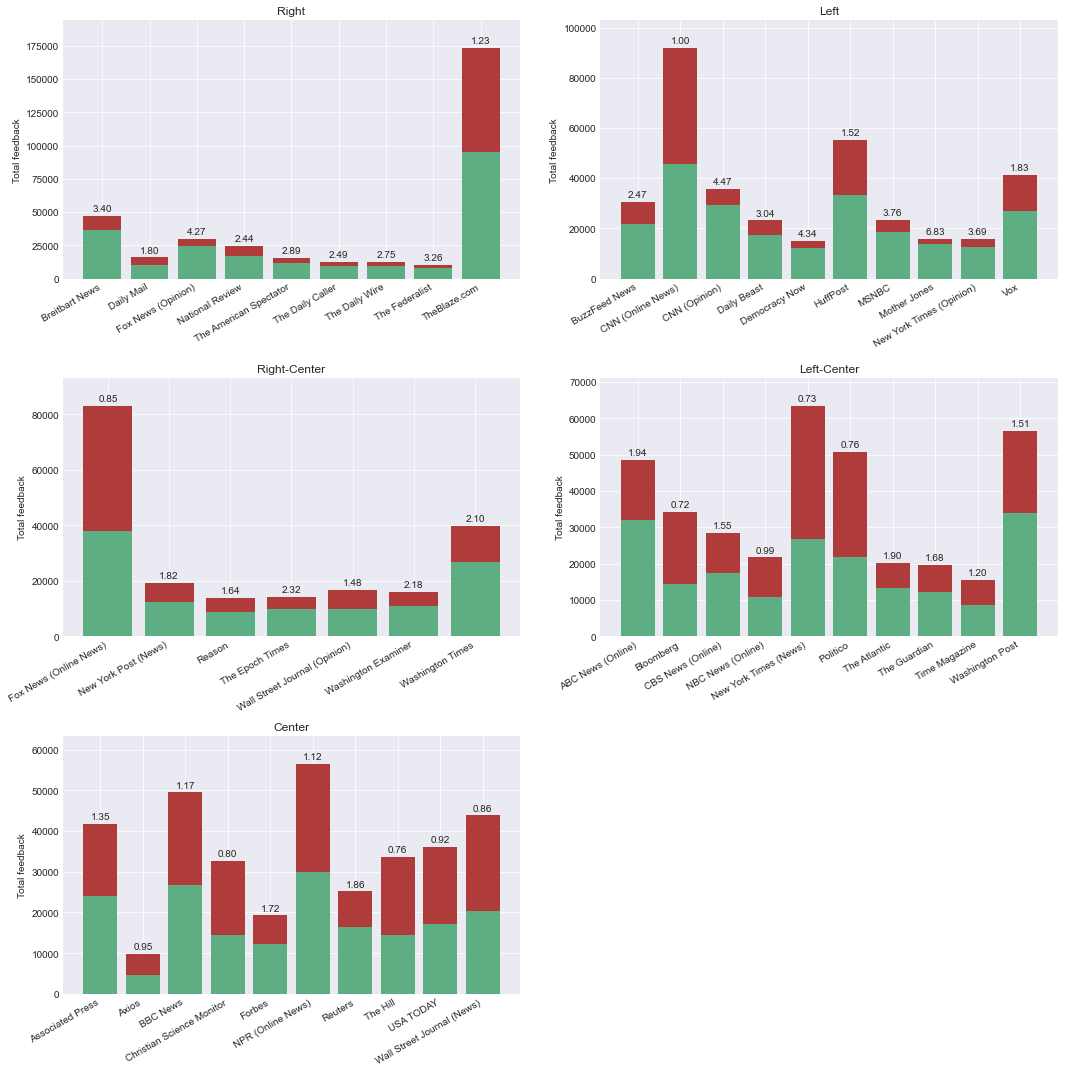

In [123]:
df3 = df.copy()

fig = plt.figure(figsize=(15,15))

biases = df3['bias'].unique()

for i, bias in enumerate(biases):
    # Get top 10 news sources for this bias and sort index alphabetically
    temp_df = df3[df3['bias'] == bias].iloc[:10]
    temp_df.sort_index(inplace=True)
    
    # Get max votes, i.e. the y value for tallest bar in this temp dataframe
    max_votes = temp_df['total_votes'].max()
    
    # Add a new subplot in the correct grid position
    ax = fig.add_subplot(len(biases) // 2 + 1, 2, i + 1)
    
    # Create the stacked bars
    ax.bar(temp_df.index, temp_df['agree'], color='#5DAF83')
    ax.bar(temp_df.index, temp_df['disagree'], bottom=temp_df['agree'], color='#AF3B3B')
    
    # Place text for the ratio on top of each bar
    for x, y, ratio in zip(ax.get_xticks(), temp_df['total_votes'], temp_df['agree_ratio']):
        ax.text(x, y + (0.02 * max_votes), f"{ratio:.2f}", ha='center')
    
    ax.set_ylabel('Total feedback')
    ax.set_title(bias.title())
    
    # Make y limit larger to compensate for text on bars
    ax.set_ylim(0, max_votes + (0.12 * max_votes))
    
    # Rotate tick labels so they don't overlap
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout(w_pad=3.0, h_pad=1.0)
plt.show()

In [124]:
#headless browser